In [112]:
import warnings
warnings.filterwarnings('ignore')
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline

# Notes

* We always work with a sample of data rather than working with whole populations.
* We use sample data to make infrerences about the population.
* While doing that we should always look out for **The standard Estimated Error**.

<hr>

* In this notebook, I will be finding the mean & proportion of different variables with 95% level of confidence.
* Before we start finding our confidence interval, we should make clear the few assumptions we are holding true for this data set.
    - Samples are SRS (Simple Random Sampling) (Observations in the population have an equal chance of being randomly selected).
    - Normality (Our Variables are following a Gaussian).
    - If not normal, then we assume normality usnig the central limit theorem (as n->inf => Gaussian).
* Calculating a confidence interval of a parameter of Interest is done by:
    - First: getting our best point estimate (usually the statistic of the sample).
    - Then: calculating our lower & upper bound for the interval. 
* What does a 95% confidence interval mean?
    - It means that we are 95% confident in the statistical procedure we are using for making this interval.
    - If we draw a 100 samples from our population, then we are expecting 95 intervals of these samples to hold our true population parameter that we are estimating.
* How to calculate a confidence interval?
    - We can get a confidence interval as follows: $$Best Estimate \pm Margin of Error$$ which is $$Population Proportion or Mean \pm (t-multiplier * Standard Error)$$

In [113]:
df = pd.read_csv('./diabetes.csv')
df.shape

(768, 9)

In [114]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


# Some checks for normality assumptions

<AxesSubplot:xlabel='Pregnancies', ylabel='Density'>

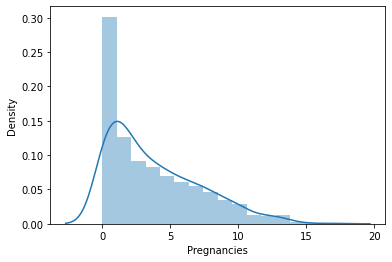

In [197]:
# This distribution is more or less normal but strongly skewed to the right
sns.distplot(df.Pregnancies)

# Now the time for questions!

## Question 1

* What proportion of people report they have diabetes (according to the sample)?
* Population -> People with diabetes
* Parameter  -> Proportion that have diabetes
* **Task: Construct a 95% confidence interval for the population proportion of people reporting they have diabetes.**

In [115]:
df.Outcome.replace({0:'Non-Diab', 1:'Diab'}, inplace=True)
print(df.Outcome.value_counts())
print('Proportion of sample diabetes: %.2f' % (df.Outcome.value_counts()[1]/df.shape[0]))

Non-Diab    500
Diab        268
Name: Outcome, dtype: int64
Proportion of sample diabetes: 0.35


In [116]:
import statsmodels.api as sm
low,up = sm.stats.proportion_confint(diabetic, n)
low,up

(0.3152483405027714, 0.38266832616389523)

## Interpreting the Result

* With 95% confidence, the population proportion of people having diabetes is estimated to be between 31.5% - 38%.

## Question 2

* What is the average times of Pregnancies for Patients with diabetes?
* Population -> All patients with diabetes.
* Parameter -> Population pregnancy times of patients with diabetes.
* **Task: Construct a 95% CI for population mean pregnancies month for all patients with diabetes**

In [117]:
df_diab = df[df.Outcome=='Diab']
df_diab.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diab
2,8,183,64,0,0,23.3,0.672,32,Diab
4,0,137,40,35,168,43.1,2.288,33,Diab
6,3,78,50,32,88,31.0,0.248,26,Diab
8,2,197,70,45,543,30.5,0.158,53,Diab


In [118]:
df_diab.Pregnancies.describe()

count    268.000000
mean       4.865672
std        3.741239
min        0.000000
25%        1.750000
50%        4.000000
75%        8.000000
max       17.000000
Name: Pregnancies, dtype: float64

In [119]:
low,up = sm.stats.DescrStatsW(df_diab['Pregnancies']).zconfint_mean()
low,up

(4.417756079185482, 5.313587204396608)

Text(0.5, 1.0, 'Pregnancies distribution for diabetic patients')

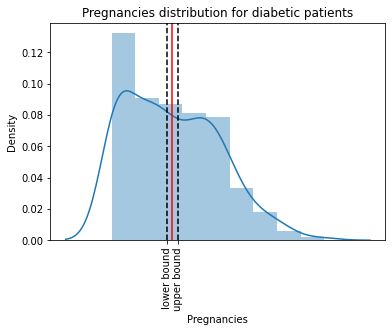

In [120]:
sns.distplot(df_diab.Pregnancies)
plt.axvline(df_diab.Pregnancies.mean(), color='r')
plt.axvline(low, color='k', ls='--')
plt.axvline(up, color='k', ls='--')
plt.xticks([low,up],['lower bound', 'upper bound'],rotation=90)
plt.title('Pregnancies distribution for diabetic patients')

## Interpreting the Result

* With 95% confidence, the population mean of Pregnancy times for people having diabetes is estimated to be between 4.41 - 5.31 pregnancies.

## Question 3:

* What is average number of pregnancy for non diabetic patients?
* Population -> All non diabetic patients
* Parameter -> Number of times pregnant
* **Task: Construct a 95% CI for population mean of pregnancies for all non diabetic patients.**

In [121]:
df_non_diab = df[df['Outcome']=='Non-Diab']
df_non_diab.loc[:,['Pregnancies', 'Outcome']].head()

,Pregnancies,Outcome
1,1,Non-Diab
3,1,Non-Diab
5,5,Non-Diab
7,10,Non-Diab
10,4,Non-Diab


In [124]:
df_non_diab.Pregnancies.describe()

count    500.000000
mean       3.298000
std        3.017185
min        0.000000
25%        1.000000
50%        2.000000
75%        5.000000
max       13.000000
Name: Pregnancies, dtype: float64

In [128]:
low,up = sm.stats.DescrStatsW(df_non_diab.Pregnancies).zconfint_mean()
low,up

(3.033536970425177, 3.562463029574823)

Text(0.5, 1.0, 'Pregnancies Distribution for Non diabatic patients')

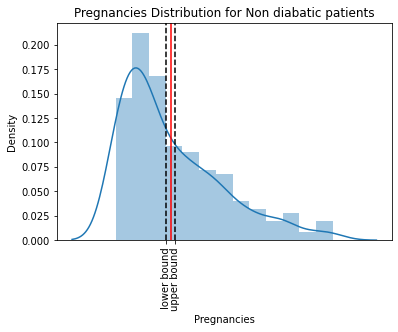

In [133]:
sns.distplot(df_non_diab.Pregnancies)
plt.axvline(df_non_diab.Pregnancies.mean(), color='r')
plt.axvline(low, color='k', ls='--')
plt.axvline(up, color='k', ls='--')
plt.xticks([low,up],['lower bound', 'upper bound'], rotation=90)
plt.title('Pregnancies Distribution for Non diabatic patients')

## Interprating the Result

* With 95% confidence, the true population mean of pregnancy number for all non diabetec patients is between 3.03 - 3.56 pregnancies.

## Question 4

* Considering Diabetic-Non Diabetic patients, do diabetic and non-diabetic patients differ significantly in mean pregnancies month?
* Population -> Diabetic and Non-Diabetic Patients
* Parameter -> (μ1 − μ2): Mean Pregnancies Number
* μ1 -> Mean pregnancies of Diabetic Patients.
* μ2 -> Mean pregnancies of Non-Diabetic Patients

## Rambling 

* To rephrase this question, we are asking if the difference in means that we observed in our samples is due to chance and the two groups are coming from the same population or there is significant difference between them?
* For this we do a hypothesis test.
    - H0: μ1 == μ2 (there is no difference)
    - HA: μ1 != μ2 (there is no difference)
* There is 2 approaches to use here, a pooled approach & non-pooled approach
    - pooled: assume that the variance is equal in 2 populations
    - non-pooled: The assumption of equal variances is dropped
* Which approach to use? that depends on our data, let's explore a little and then choose!
    - As you can see on the box plots below, the IQR or the variance is pretty much the same.

In [144]:
df.groupby('Outcome').describe()['Pregnancies'].T.loc[['mean', 'std'],:]

Outcome,Diab,Non-Diab
mean,4.865672,3.298000
std,3.741239,3.017185


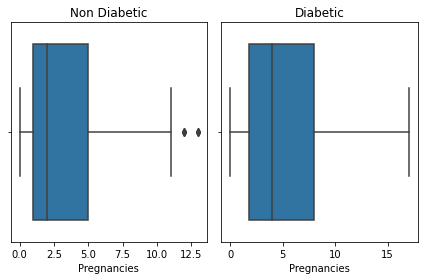

In [167]:
fig,ax = plt.subplots(nrows=1,ncols=2)
sns.boxplot(df_non_diab.Pregnancies,ax=ax[0],orient='v')
sns.boxplot(df_diab.Pregnancies,ax=ax[1],orient='v')
ax[0].set_title('Non Diabetic')
ax[1].set_title('Diabetic')
plt.tight_layout()

In [186]:
from scipy.stats import ttest_rel
# ttest_rel(df_diab.Pregnancies), df_non_diab.Pregnancies))
g1 = np.asarray(df_diab.Pregnancies)
g2 = np.asarray(df_non_diab.Pregnancies)
gg1 = g1[np.random.choice(len(g1),size=100)]
gg2 = g2[np.random.choice(len(g2),size=100)]

t,pvalue = ttest_rel(gg1, gg2)
t,pvalue

(2.3870925663883145, 0.018881296934367752)

## Interpreting Results

* Our p-value=0.01 < 0.05, so we have statistically significant evidence to reject the null hypothesis H0 & we accept the alternative hypothesis Ha.
* With 95% confidence, we say that there is a difference between the mean pregnancies between the 2 groups (diabetic and non diabetic people).